# TP TOPOLOGIE ALGEBRIQUE

##Préparer par:
**Rami EL FEGHALI - Sory BARRY**

## 1. Introduction

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import statistics

## 2. Generation d'un ensemblre de sommets

### Question 1

In [ ]:
l= 100 #lambda, intensité du processus de Poisson
a= 1 #a est le coté du carré

mu= l*a*a #la mesure mu d'intensité lambda est égale à lambda*delta, avec delta la mesure de Lebesgue, 
#vu qu'on travaille dans un domaine de R**2, la mesure de Lebesgue est donc l'aire du carré de coté a

N = np.random.poisson(mu)

print("Le nombre de points est: " , N)

Le nombre de points est:  99


In [ ]:
dataset=np.zeros((N,2)) #Matrice N lignes deux colonnes contenant les coordonnées des points
for i in range(N):
  dataset[i][0] = np.random.uniform(0,a)
  dataset[i][1] = np.random.uniform(0,a) 

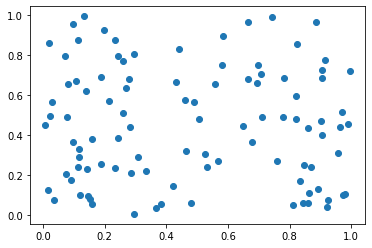

In [ ]:
plt.scatter(dataset[:,0],dataset[:,1])

## 3. Construction du complede simplicial

### Question 2

In [ ]:
def distance(x,y):
  X=[float(x[0]),float(x[1])]
  Y=[float(y[0]),float(y[1])]
  return np.sqrt((X[0]-Y[0])**2+(X[1]-Y[1])**2)

In [ ]:
epsilon= 0.1
zero_simplex=dataset.copy()


un_simplex=[]
deux_simplex=[]

iterator_1=1
for i in dataset:
  iterator_2=iterator_1+1
  for j in dataset[iterator_1:,:]:
    if distance(i,j)< epsilon: 
      un_simplex.append([i,j])

      for k in dataset[iterator_2:,:]:
        if distance(i,k)< epsilon and distance(j,k)< epsilon:
          deux_simplex.append([i,j,k])
    iterator_2+=1
  iterator_1+=1

In [ ]:
print(len(un_simplex))
print(len(deux_simplex))

145
82


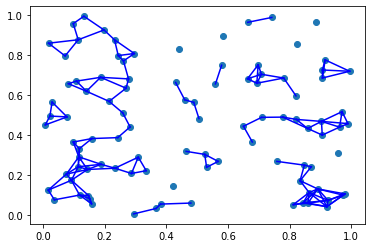

In [ ]:
#plot 1-simplex:
plt.scatter(dataset[:,0],dataset[:,1])
X=[]
Y=[]
for i in un_simplex:
  X=[i[0][0],i[1][0]]
  Y=[i[0][1],i[1][1]]
  plt.plot(X,Y,'-b')

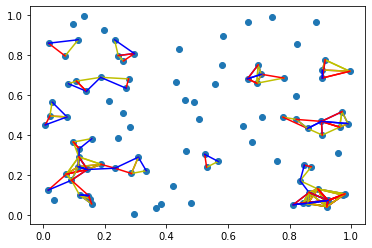

In [ ]:
#plot 1-simplex:
plt.scatter(dataset[:,0],dataset[:,1])
for i in deux_simplex:
  X=i[0]
  Y=i[1]
  Z=i[2]
  plt.plot([X[0],Y[0]],[X[1],Y[1]],'-y')
  plt.plot([X[0],Z[0]],[X[1],Z[1]],'-r')
  plt.plot([Y[0],Z[0]],[Y[1],Z[1]],'-b')

## 4. Calcul de la topologie

### Question 3

In [ ]:
#calcul de delta_1
delta_1=np.zeros((N,len(un_simplex)))

iterator=0
for j in un_simplex:
  delta_1[np.where(np.all(dataset==j[0],axis=1))[0][0]][iterator]=-1
  delta_1[np.where(np.all(dataset==j[1],axis=1))[0][0]][iterator]=1
  iterator+=1


#calcul de delta_2

delta_2=np.zeros((len(un_simplex),len(deux_simplex)))

iterator=0
tmp_un_simplex= np.array(un_simplex)
for j in deux_simplex:
  delta_2[np.where(np.all(tmp_un_simplex==[j[0],j[1]],axis=1))[0][0]][iterator]=1
  delta_2[np.where(np.all(tmp_un_simplex==[j[0],j[2]],axis=1))[0][0]][iterator]=-1
  delta_2[np.where(np.all(tmp_un_simplex==[j[1],j[2]],axis=1))[0][0]][iterator]=1
  iterator+=1

### Question 4

In [ ]:
rang_delta_1= np.linalg.matrix_rank(delta_1)
rang_delta_2= np.linalg.matrix_rank(delta_2)

B0=N-rang_delta_1
B1=len(un_simplex)- rang_delta_1 - rang_delta_2
print("B0= ", B0 )
print("B1= ", B1)

B0=  17
B1=  3


En effet on peut verifier le resultat sur la figure du un_simplex en comptant le nombre de comosante complexe et qui doit correspondre a B0 , et le nombre de trou de couverture correspond a B1

### Question 5

In [ ]:
print("Etant dans un espace de dimension 2, la caractéristique d'Euler est :", B0-B1)

Etant dans un espace de dimension 2, la caractéristique d'Euler est : 14


## 5. Resultats en moyenne

*Il est conseillé de ne pas run les cellules en bas car cela va prendre +-45min (google colab) et de juste voir le resultat de notre simulation*

### Question 6

In [ ]:
def function(l): #mise en fonction des codes precedents dans le but de simuler une boucle
  a= 1 
  mu= l*a*a 
  N=0
  while N==0: #pour eveiter d'avoir 0 points quand lambda est faible
    N = np.random.poisson(mu)


  dataset=np.zeros((N,2)) 
  for i in range(N):
    dataset[i][0] = np.random.uniform(0,a)
    dataset[i][1] = np.random.uniform(0,a) 


  epsilon= 0.1
  zero_simplex=dataset.copy()


  un_simplex=[]
  deux_simplex=[]

  iterator_1=1
  for i in dataset:
    iterator_2=iterator_1+1
    for j in dataset[iterator_1:,:]:
      if distance(i,j)< epsilon: 
        un_simplex.append([i,j])

        for k in dataset[iterator_2:,:]:
          if distance(i,k)< epsilon and distance(j,k)< epsilon:
            deux_simplex.append([i,j,k])
      iterator_2+=1
    iterator_1+=1


  delta_1=np.zeros((N,len(un_simplex)))

  iterator=0
  for j in un_simplex:
    delta_1[np.where(np.all(dataset==j[0],axis=1))[0][0]][iterator]=-1
    delta_1[np.where(np.all(dataset==j[1],axis=1))[0][0]][iterator]=1
    iterator+=1



  delta_2=np.zeros((len(un_simplex),len(deux_simplex)))

  iterator=0
  tmp_un_simplex= np.array(un_simplex)
  for j in deux_simplex:
    delta_2[np.where(np.all(tmp_un_simplex==[j[0],j[1]],axis=1))[0][0]][iterator]=1
    delta_2[np.where(np.all(tmp_un_simplex==[j[0],j[2]],axis=1))[0][0]][iterator]=-1
    delta_2[np.where(np.all(tmp_un_simplex==[j[1],j[2]],axis=1))[0][0]][iterator]=1
    iterator+=1


  if delta_1.size==0:  #pour eviter une erreur de code dans la fonction linal.matrix_rank quand la matrice est nulle
    rang_delta_1=0
  else:
    rang_delta_1= np.linalg.matrix_rank(delta_1)
  if delta_2.size==0:
      rang_delta_2=0
  else:
    rang_delta_2= np.linalg.matrix_rank(delta_2)

  B0=N-rang_delta_1
  B1=len(un_simplex)- rang_delta_1 - rang_delta_2

  ksi= B0-B1



  return B0,B1,ksi

In [ ]:
# temps de simulation +-46min
B0=[]
B1=[]
ksi=[]
lbd=[]
for l in range(1,201):
  print(l)
  lbd.append(l)
  B0_tmp=[]
  B1_tmp=[]
  ksi_tmp=[]
  t1,t2,t3=0,0,0
  for s in range(100):
    t1,t2,t3=function(l)
    B0_tmp.append(t1)
    B1_tmp.append(t2)
    ksi_tmp.append(t3)

  B0.append(statistics.mean(B0_tmp))
  B1.append(statistics.mean(B1_tmp))
  ksi.append(statistics.mean(ksi_tmp))

B0:  [1, 2, 3, 3, 4, 5, 6, 6, 8, 8, 9, 9, 10, 11, 11, 12, 12, 13, 14, 14, 15, 16, 15, 16, 16, 18, 17, 18, 18, 19, 20, 19, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 22, 22, 23, 23, 23, 23, 22, 23, 23, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 21, 22, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 19, 20, 19, 20, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 17, 17, 17, 16, 17, 16, 17, 15, 16, 15, 15, 15, 16, 14, 14, 15, 15, 14, 13, 14, 13, 14, 13, 14, 12, 12, 12, 12, 11, 12, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 9, 10, 10, 10, 9, 9, 8, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
B1:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

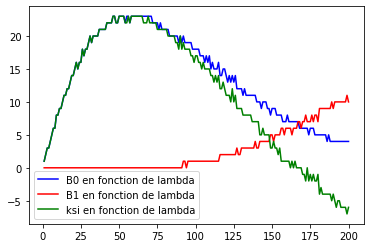

In [ ]:
print("B0: ",B0)
print("B1: ", B1)
print("ksi: ", ksi)

plt.plot(lbd,B0,"-b",label="B0 en fonction de lambda")
plt.plot(lbd,B1,"-r",label="B1 en fonction de lambda")
plt.plot(lbd,ksi,"-g",label="ksi en fonction de lambda")
plt.legend()

### Question 7

* Courbe B0 (bleu):\
On remarque que la courbe bleu augmente quand lambda augmente et cela jusqu'a un maximum donné au alentour de lambda=50 pour ensuite diminuer vers 1.\
En effet, B0 signifie le nombre de composante connexe, et donc le nombre de composante connexe commence par etre assez proche du nombre de point present, surtout pour un lambda petit (peu de point dans l'espace) et pour un epsilon petit. Quand lambda augmente, le nombre depoint augement et donc plus de point seronnt proche d'une distance expsilon et donc des composante connexe vont commencer à se former. A la limite quand on aura beaucoup de points dans l'espace on aura plus qu'une seule composante connexe.

* Courbe B1 (rouge):\
On remarque que cette courbe est nulle au debut pour ensiute commencer à augmenter quand lambda augmente.\
En effet, B1 reprensente le nombre de trou de couverture, or au debut quand on a peu de point on en a aucun. Ce nombre commence à augmenter au fur et à mesure qu'on a plus de point dans le plan.

* Courbe ksi (vert):\
On remarque que cette courbe qui en fait est la difference entre B0 et B1 suis les memes variations que B0. Mais avec une decroissance plus rapide.